In [2]:
import qiskit

In [3]:
from qiskit import QuantumCircuit,transpile

from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeVigo, FakePerth
from qiskit import execute
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

In [4]:
from qiskit.quantum_info import Operator
import numpy as np

In [129]:
def grover_diffusion(circ,type=QuantumCircuit):
    circ.h([0,1,2])

    s=np.zeros([8,8])
    s[0][0]=1
    s=Operator(2*s-np.identity(8))
    circ.append(s,[0,1,2])
    circ.h([0,1,2])
    circ.barrier()
    return circ



In [145]:
#Oracle for three qubit. We can only search from 0 to 7
#For example, if omaga is 5, Binary repersent is 101, the oracle is 
def oracle(circ,type=QuantumCircuit):

    
    a=np.identity(16)
    a[5][5]=-1
    a = Operator(a)
    circ.append(a,[0,1,2,3])

    
    return circ



In [146]:


circ = QuantumCircuit(4,3)
circ.x(3)
circ.h([0,1,2,3])


circ=oracle(circ)


circ.barrier()
# circ.append(oracle(circ),[0,1,2])
# a= diffuser(3)
# # print(a)
# circ.append(a,[0,1,2])
circ = grover_diffusion(circ)
circ = grover_diffusion(circ)
circ = grover_diffusion(circ)

circ.measure([0,1,2],[0,1,2])


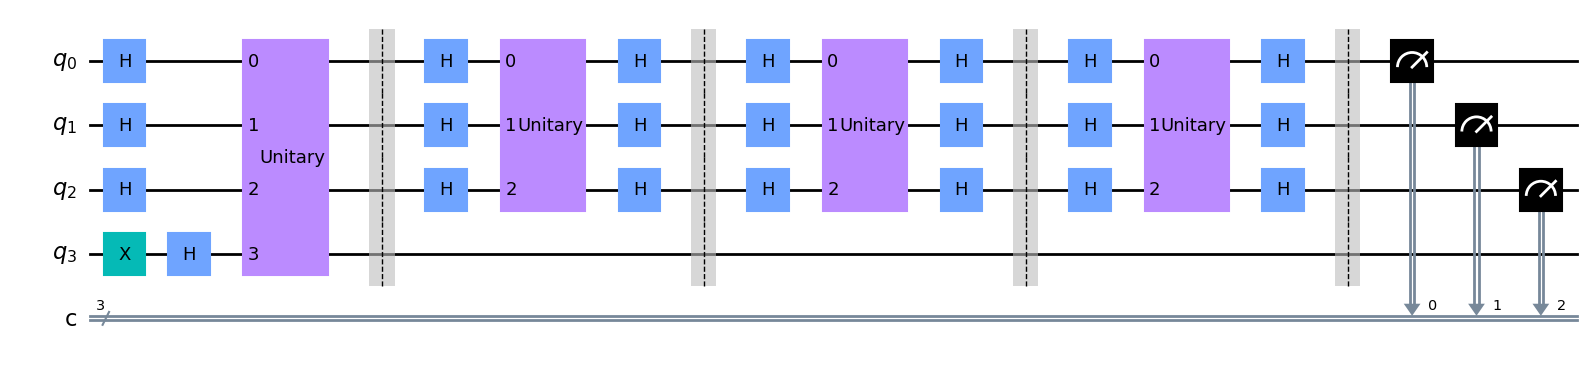

In [147]:
circ.draw(output='mpl')

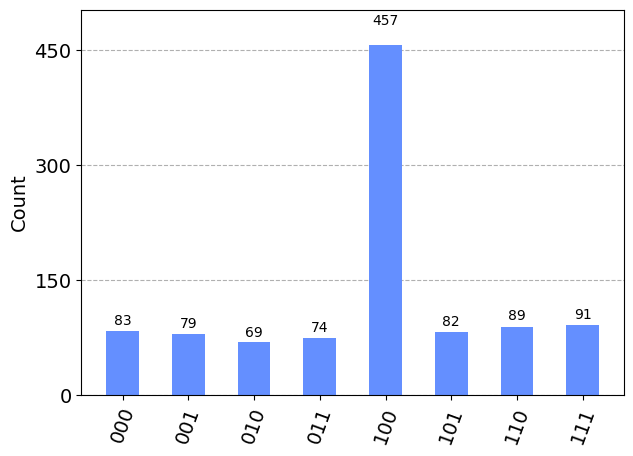

In [148]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(circ, qasm_sim)
results = qasm_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

In [117]:
# For 5 qubit, we can have 0 to 31, Suppose we want to find 18 and 26, the oracle is 
def oracle(circ,type=QuantumCircuit):

    
    a=np.identity(64)
    a[18][18]=-1
    a[26][26]=-1
    a = Operator(a)
    circ.append(a,[0,1,2,3,4,5])

    circ.barrier()
    return circ

In [119]:
def grover_diffusion(circ,type=QuantumCircuit):
    circ.h([0,1,2,3,4])

    s=np.zeros([32,32])
    s[0][0]=1
    s=Operator(2*s-np.identity(32))
    circ.append(s,[0,1,2,3,4])
    circ.h([0,1,2,3,4])
    circ.barrier()
    return circ


In [49]:
import math

In [123]:
circ = QuantumCircuit(6,5)
circ.x(5)
circ.h([0,1,2,3,4,5])
# circ.barrier()
circ=oracle(circ)
# circ.append(oracle(circ),[0,1,2])
# a= diffuser(3)
# # print(a)
# circ.append(a,[0,1,2])
n=int(round(math.pi*np.sqrt(5)/4))
for i in range(n+1):
    circ = grover_diffusion(circ)

circ.measure([0,1,2,3,4],[0,1,2,3,4])

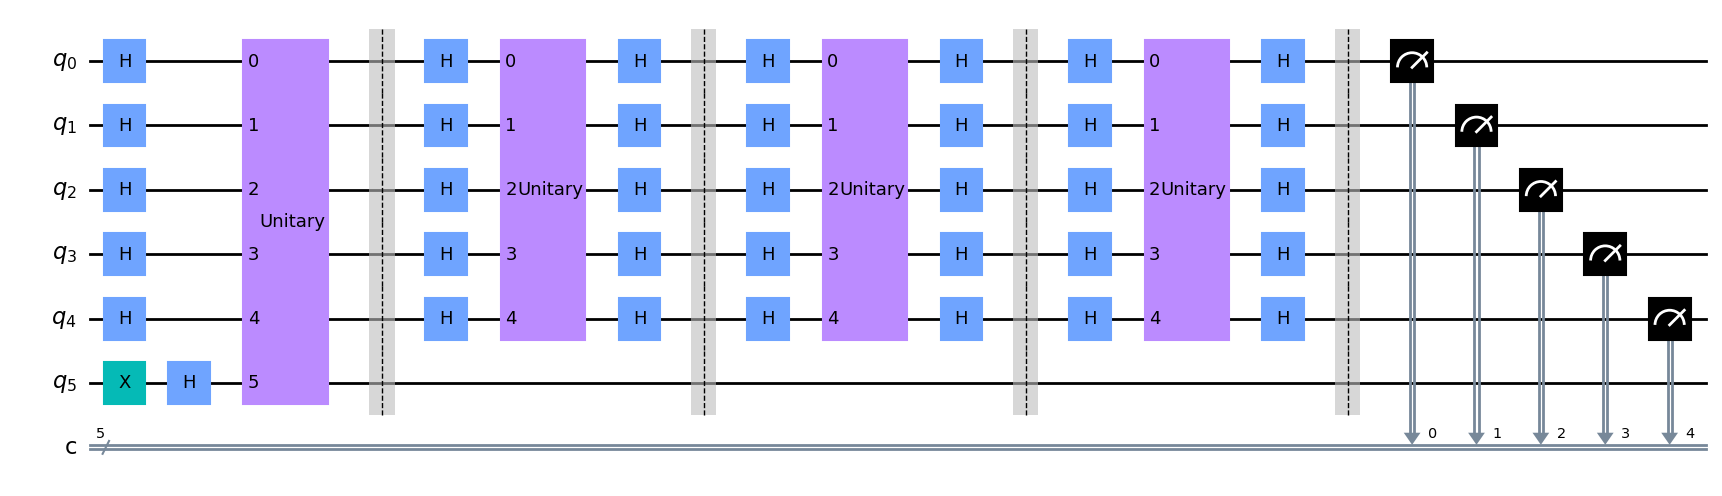

In [124]:
circ.draw(output='mpl')

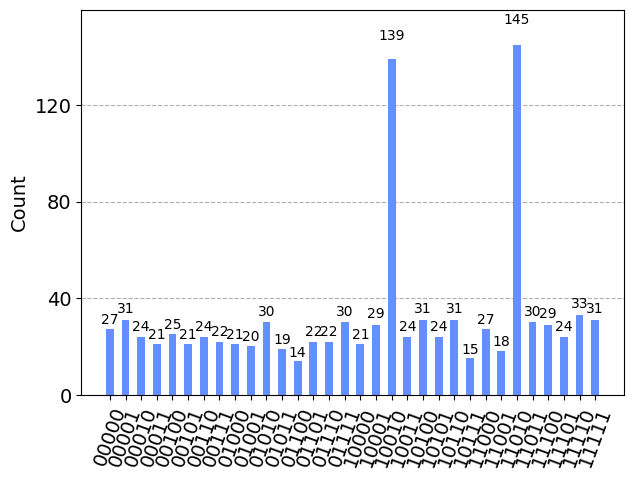

In [125]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_grover_circuit = transpile(circ, qasm_sim)
results = qasm_sim.run(transpiled_grover_circuit).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
#Result is 10001 and 11001